In [157]:
from math import sqrt
from csv import reader
import random
#定义距离函数
# 输入两个n维向量，返回欧式距离
def euclidean_distance(v1, v2):
    #assert len(v1) == len(v2), "Error: Input vectors should have same length"
    
    return sqrt(sum((e1-e2)**2 for e1, e2 in zip(v1,v2)))

#Manhattan distance
def m_distance(v1, v2):
    assert len(v1) == len(v2), "Error: Input vectors should have same length"
    
    return sum(abs(e1-e2) for e1, e2 in zip(v1, v2))
    
    

In [193]:
# 得到距离前k个数据， 并返回预测标签
# 输入训练数据带标签：[(x1,x2..xn, y), (x2,x2i..x2n, y)]
# 预测单个样本， len(y)=1
def predict(train, test_row, k):
    distances = list()
    
    #1 计算距离
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist)) 
        #将训练数据行和距离合并，因为要返回该训练数据点的信息

    distances.sort(key=lambda tup: tup[1]) #tuple[(x1,x2),dist] 对距离排序
    neighbors = list()
    #2 取前k个返回 格式为[x1,x2,...xn, y]
    for i in range(k):
        neighbors.append(distances[i][0])
    
    #3 计算最多的类标签
    k_labels = [row[-1] for row in neighbors]
    predict = max(set(k_labels), key=k_labels.count)
    #print( k_labels)
    return predict

# 输入类别矩阵test,返回多个预测值
def knn_predict(train, test, k):
    all_pred = list()
    for row in test:
        output = predict(train, row, k)
        all_pred.append(output)
    return all_pred

In [194]:
#其他辅助函数

#计算准确率
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

#手动导入数据
# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())
        
# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup


In [250]:
#预备数据

filename = 'iris.csv'
dataset = load_csv(filename)
#str 转为int
for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)

#随机分配训练和测试集
#
random.seed(111)
random.shuffle(dataset)
train = dataset[:120]
test = dataset[120:]
true_test_labels = [row[-1] for row in test]
#remove last label in test set
for i in range(len(test)):
    test[i][-1] = None

#训练过程
predicte_labels = knn_predict(train, test, k=5)

#计算准确率
acc = accuracy_metric(true_test_labels, predicte_labels)
print('Accuracy of model ' + str(round(acc, 2)) + ' %.')

Accuracy of model 96.67 %.


In [238]:
# Fitting clasifier to the Training set
# Loading libraries
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

iris = pd.read_csv("iris.csv")
X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=5)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


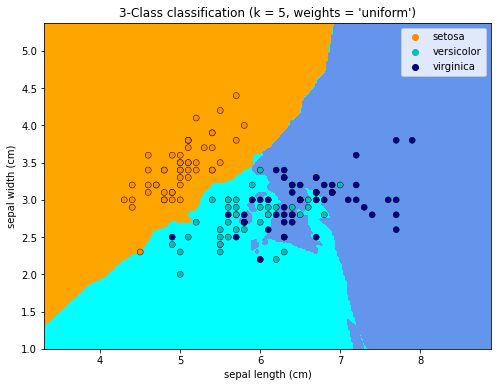

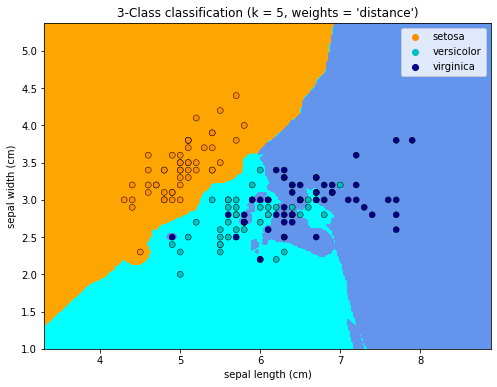

In [245]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 5

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()